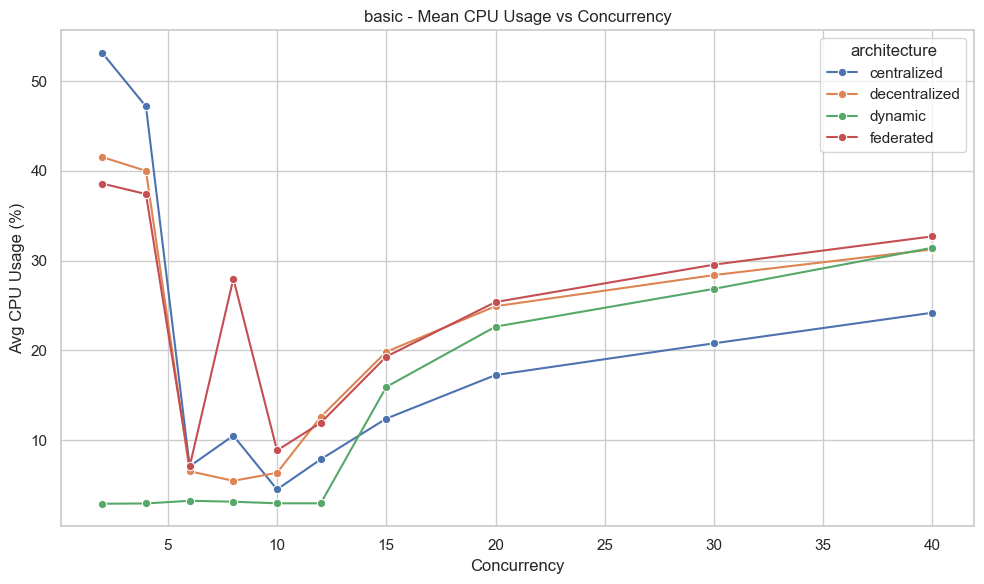

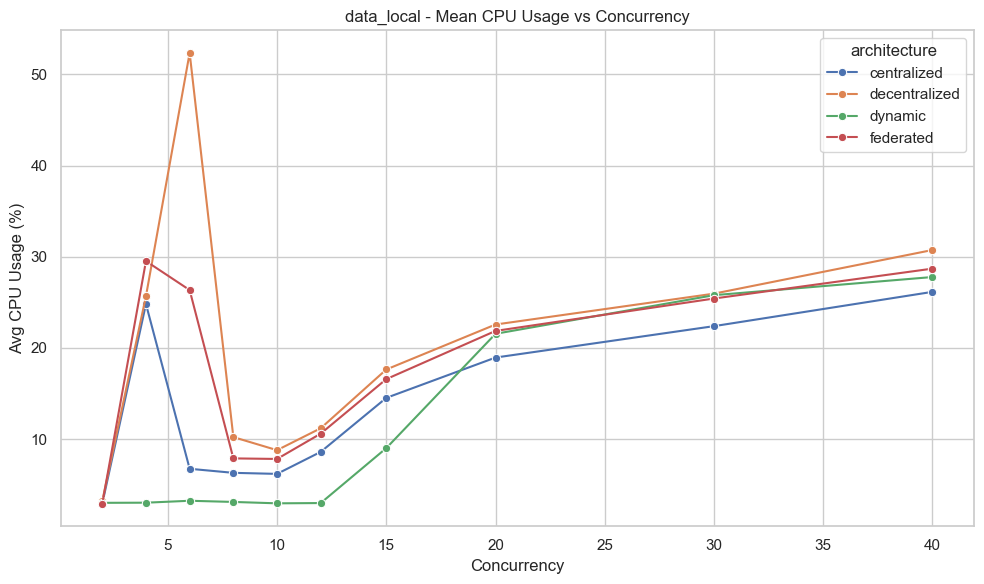

In [2]:
# not used a the result does not show a trend
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

fn_types = ["basic", "data_local"]
arch_files = {
    "centralized": "metrics_unit_centralized_all.csv",
    "federated": "metrics_unit_federated_all.csv",
    "decentralized": "metrics_unit_decentralized_all.csv",
    "dynamic": "metrics_unit_dynamic_all.csv"
}

df_list = []

for fn_type in fn_types:
    for arch, filename in arch_files.items():
        filepath = os.path.join(fn_type, filename)
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            df["architecture"] = arch
            df["fn_type"] = fn_type
            df_list.append(df)
        else:
            print(f"⚠️ File not found: {filepath}")

df_all = pd.concat(df_list, ignore_index=True)
df_all["concurrency"] = df_all["concurrency"].astype(int)


for fn in ["basic", "data_local"]:
    fn_df = df_all[df_all["fn_type"] == fn]
    cpu_avg = fn_df.groupby(["architecture", "concurrency"])["avg_cpu"].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=cpu_avg, x="concurrency", y="avg_cpu", hue="architecture", marker="o")
    plt.title(f"{fn} - Mean CPU Usage vs Concurrency")
    plt.xlabel("Concurrency")
    plt.ylabel("Avg CPU Usage (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



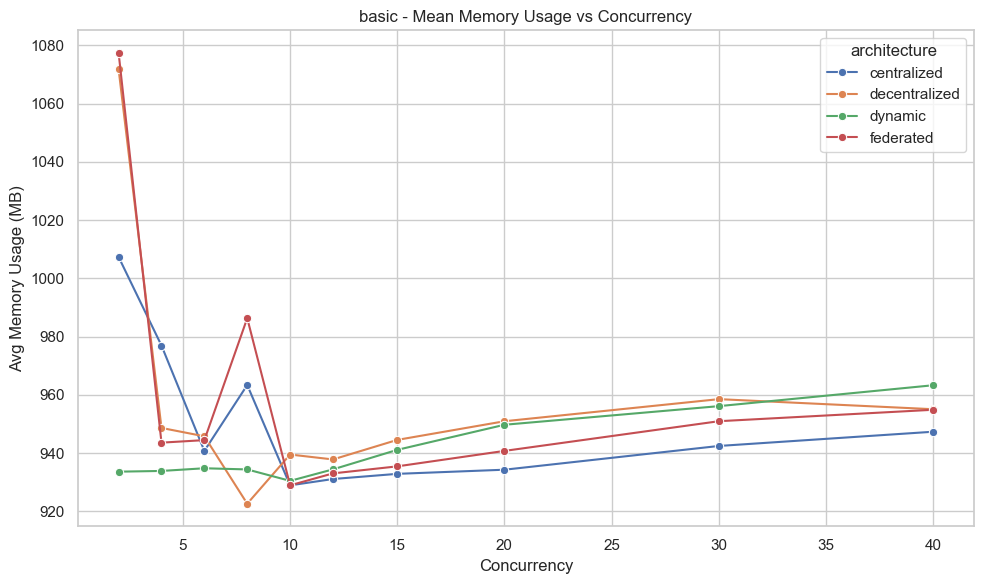

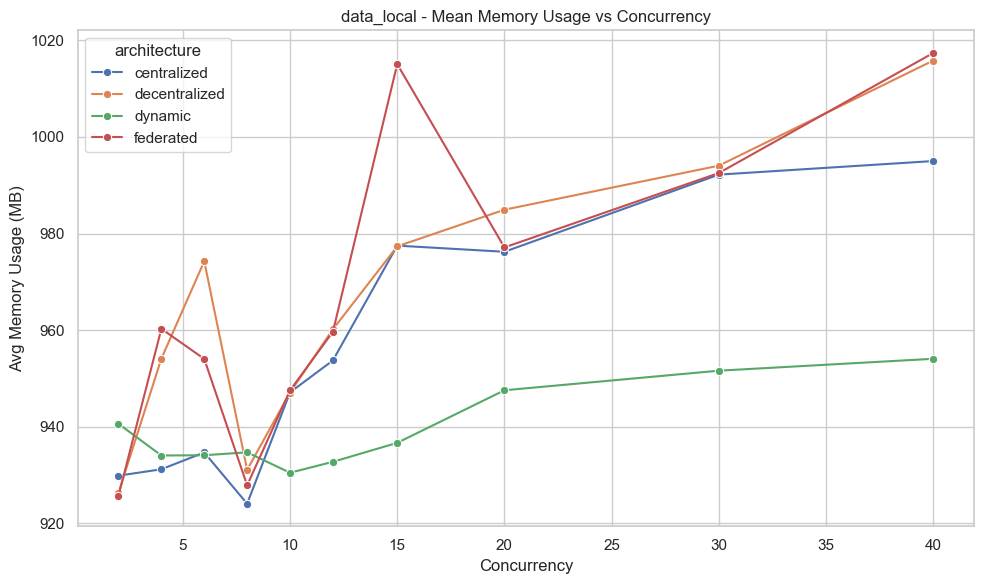

In [3]:
for fn in ["basic", "data_local"]:
    fn_df = df_all[df_all["fn_type"] == fn]
    mem_avg = fn_df.groupby(["architecture", "concurrency"])["avg_mem_MB"].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=mem_avg, x="concurrency", y="avg_mem_MB", hue="architecture", marker="o")
    plt.title(f"{fn} - Mean Memory Usage vs Concurrency")
    plt.xlabel("Concurrency")
    plt.ylabel("Avg Memory Usage (MB)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



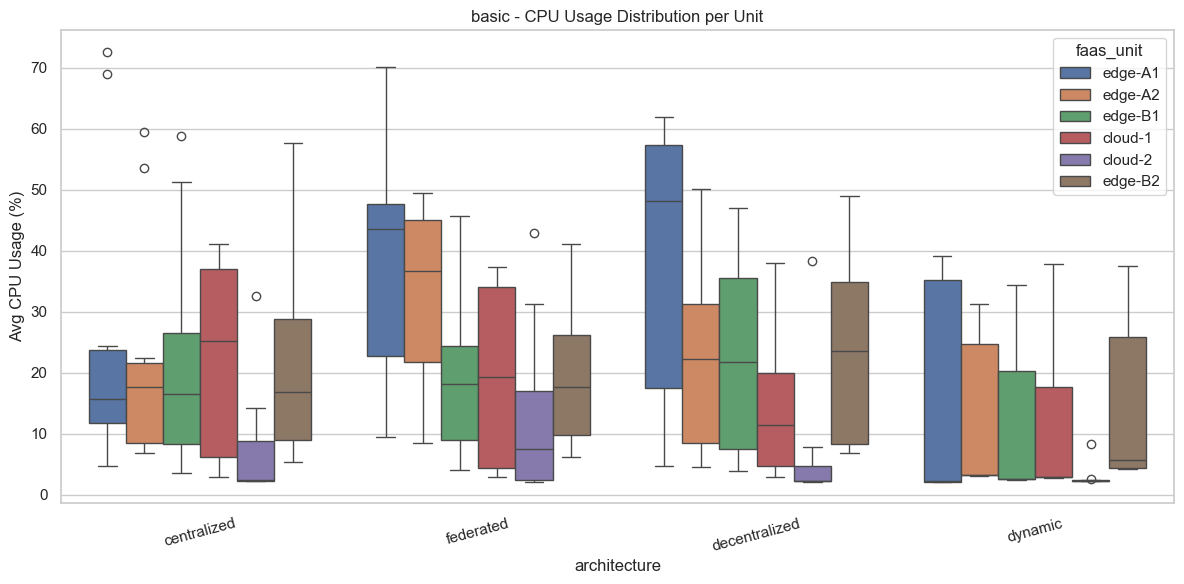

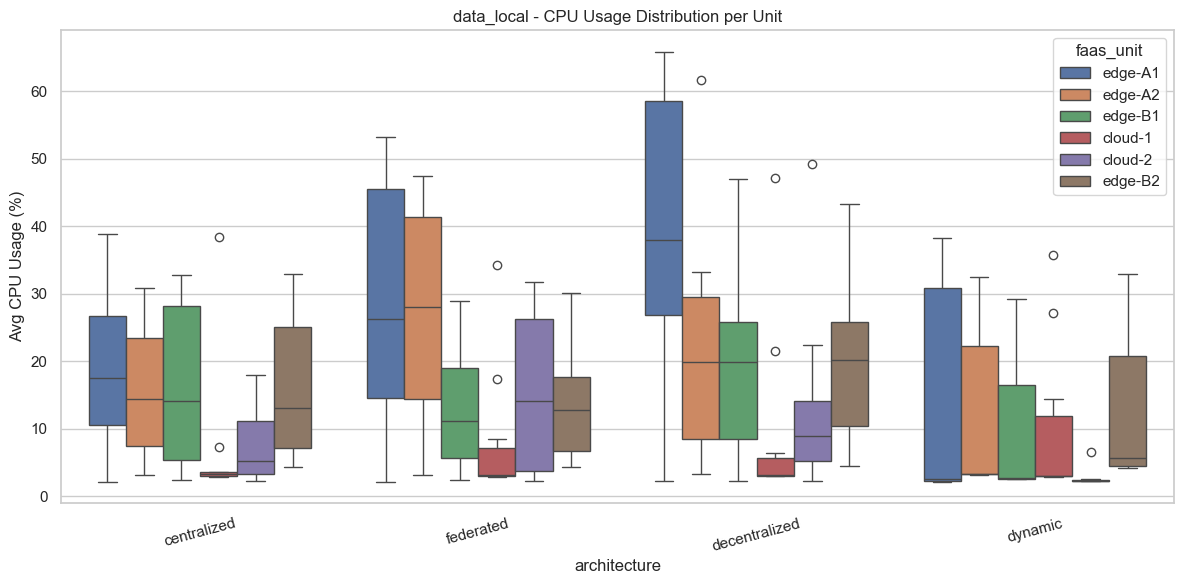

In [4]:
for fn in ["basic", "data_local"]:
    fn_df = df_all[df_all["fn_type"] == fn]

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=fn_df, x="architecture", y="avg_cpu", hue="faas_unit")
    plt.title(f"{fn} - CPU Usage Distribution per Unit")
    plt.ylabel("Avg CPU Usage (%)")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()



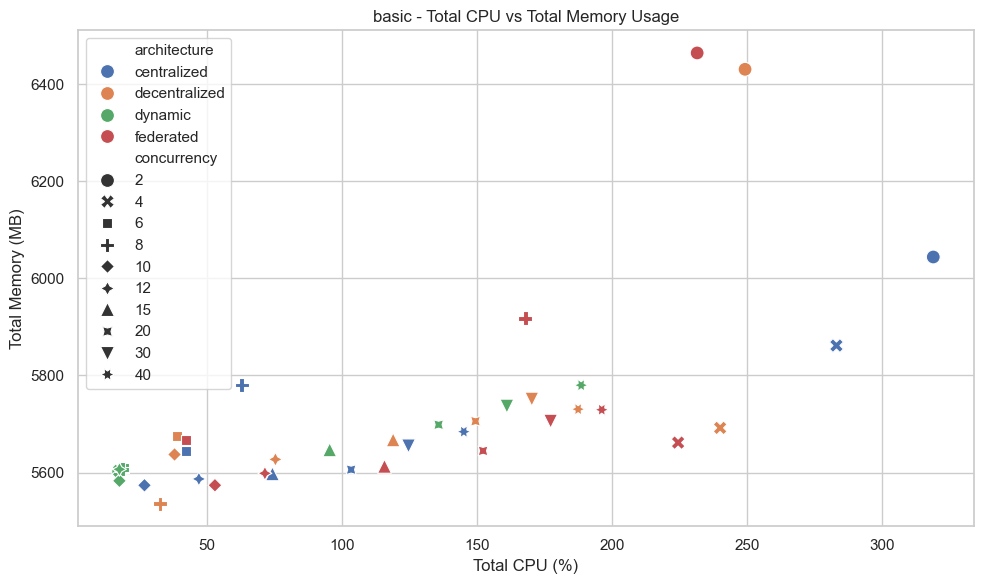

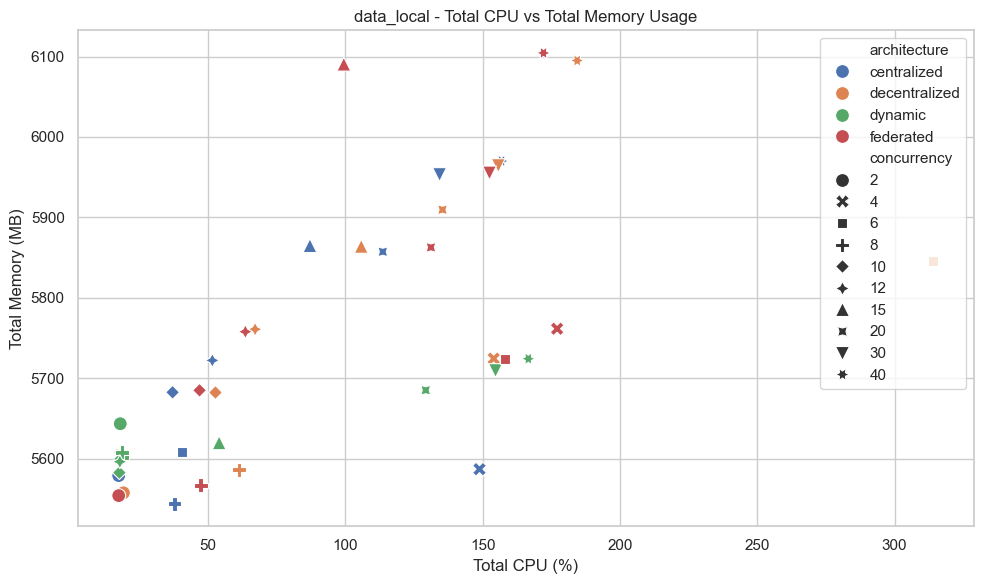

In [5]:
for fn in ["basic", "data_local"]:
    fn_df = df_all[df_all["fn_type"] == fn]
    grouped = fn_df.groupby(["architecture", "concurrency"])[["avg_cpu", "avg_mem_MB"]].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=grouped, x="avg_cpu", y="avg_mem_MB", hue="architecture", style="concurrency", s=100)
    plt.title(f"{fn} - Total CPU vs Total Memory Usage")
    plt.xlabel("Total CPU (%)")
    plt.ylabel("Total Memory (MB)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

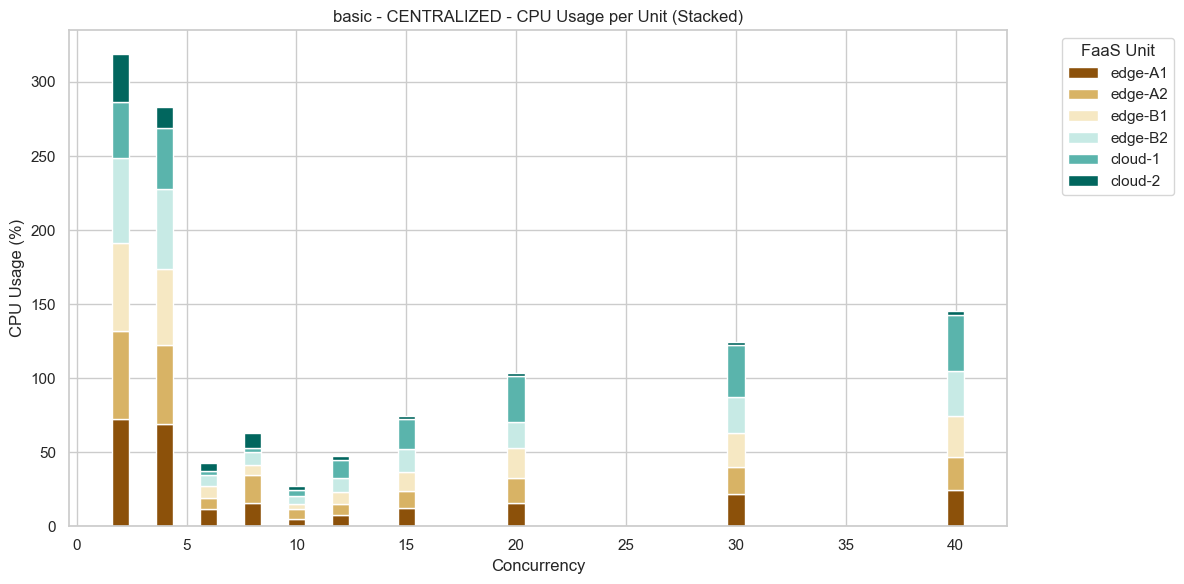

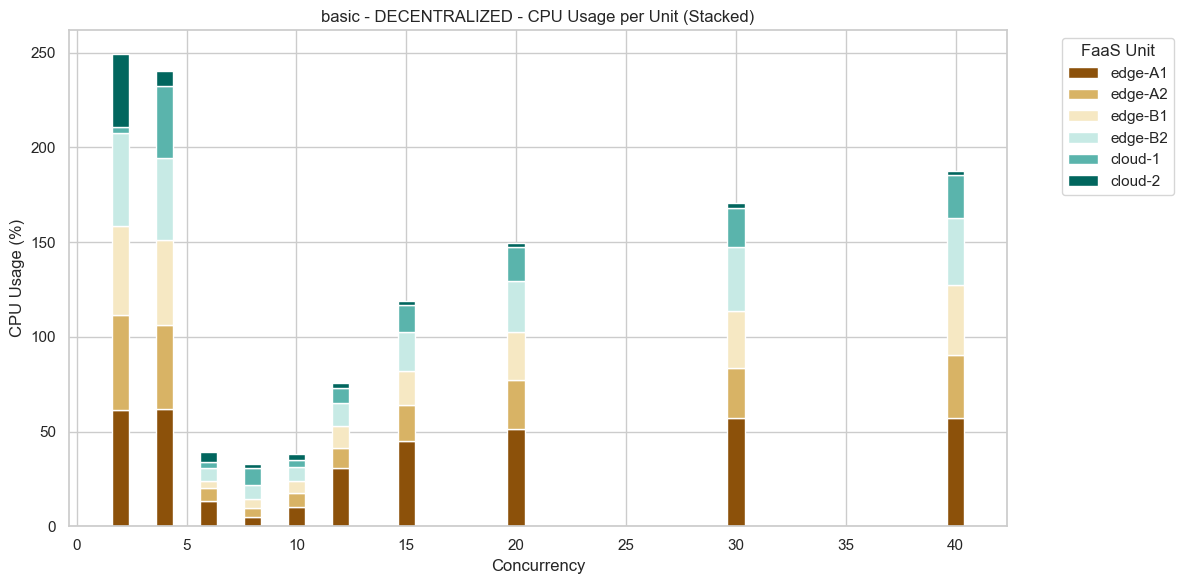

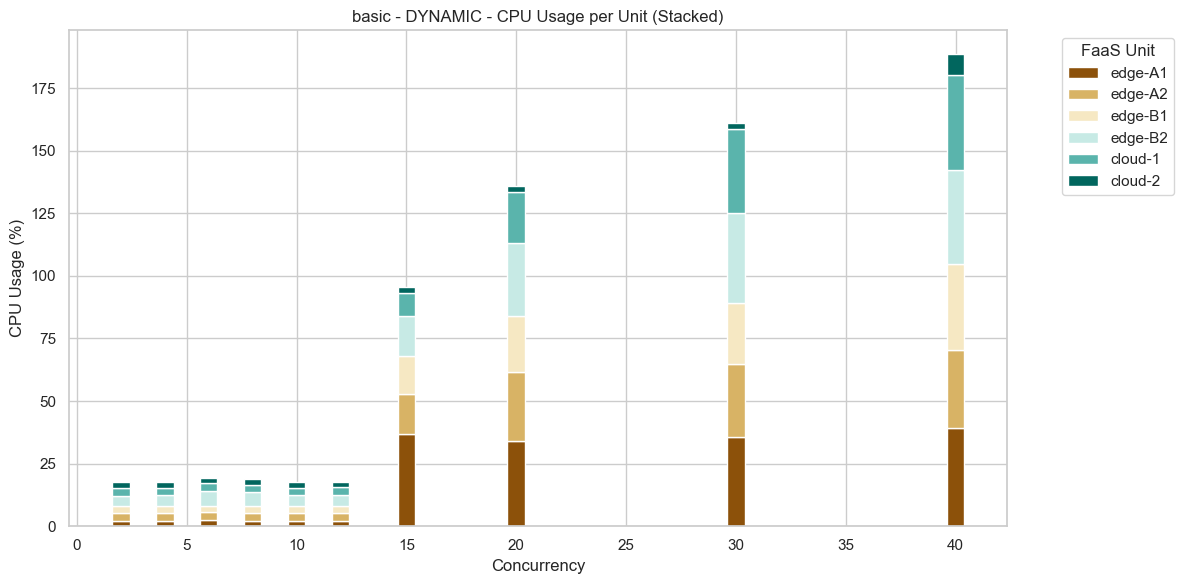

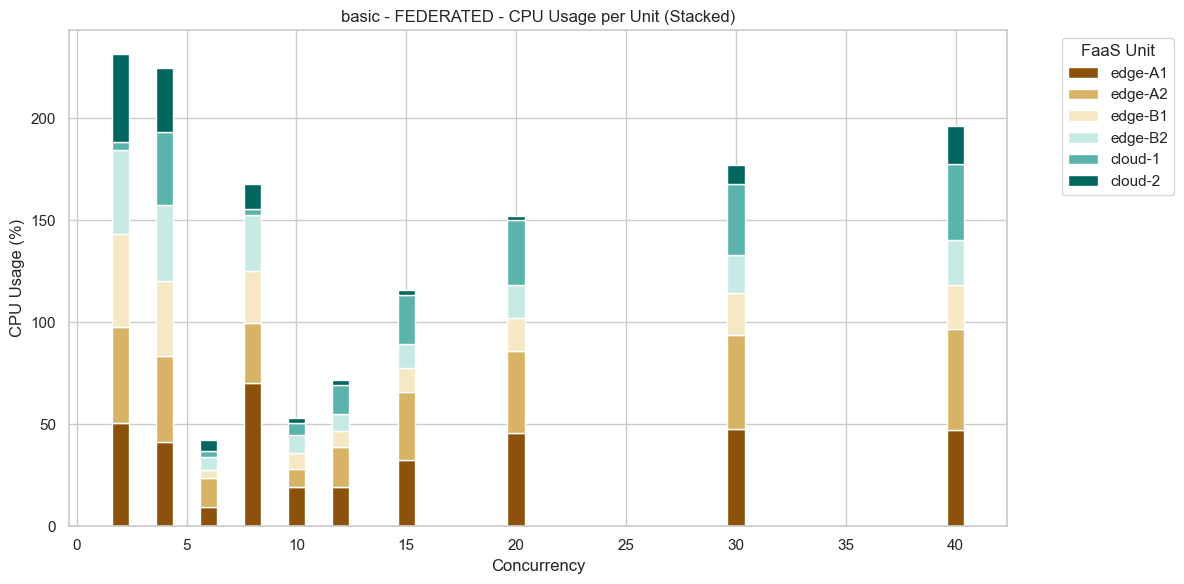

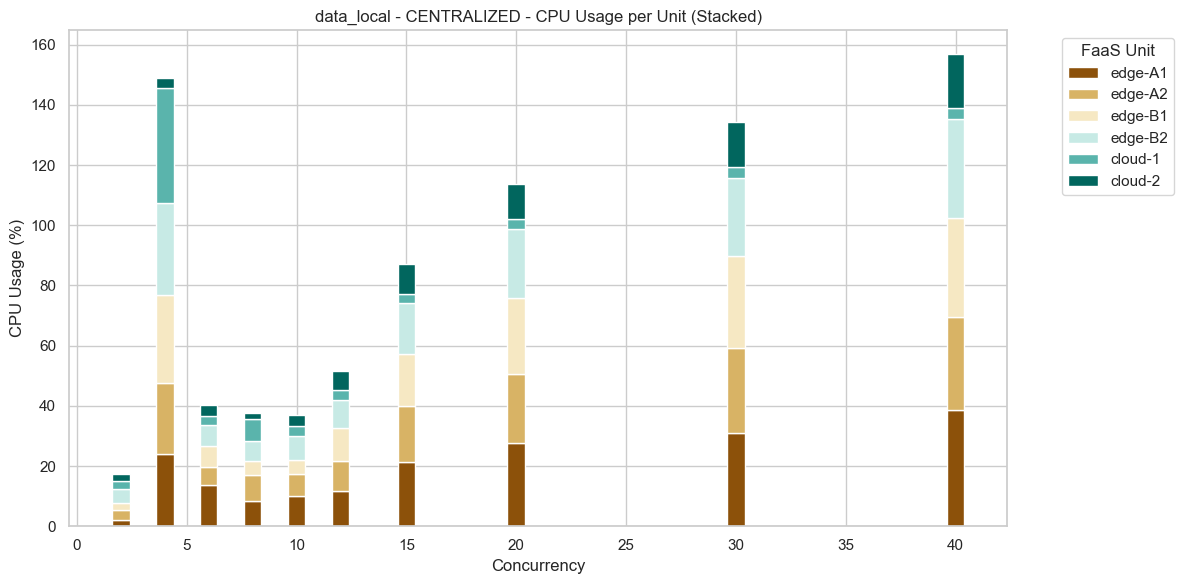

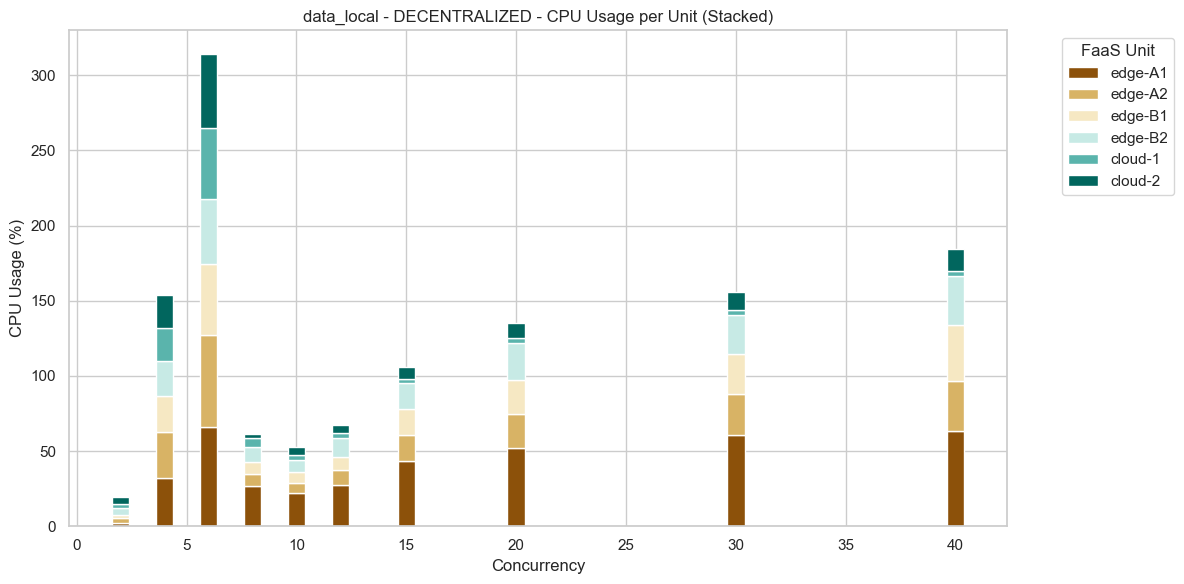

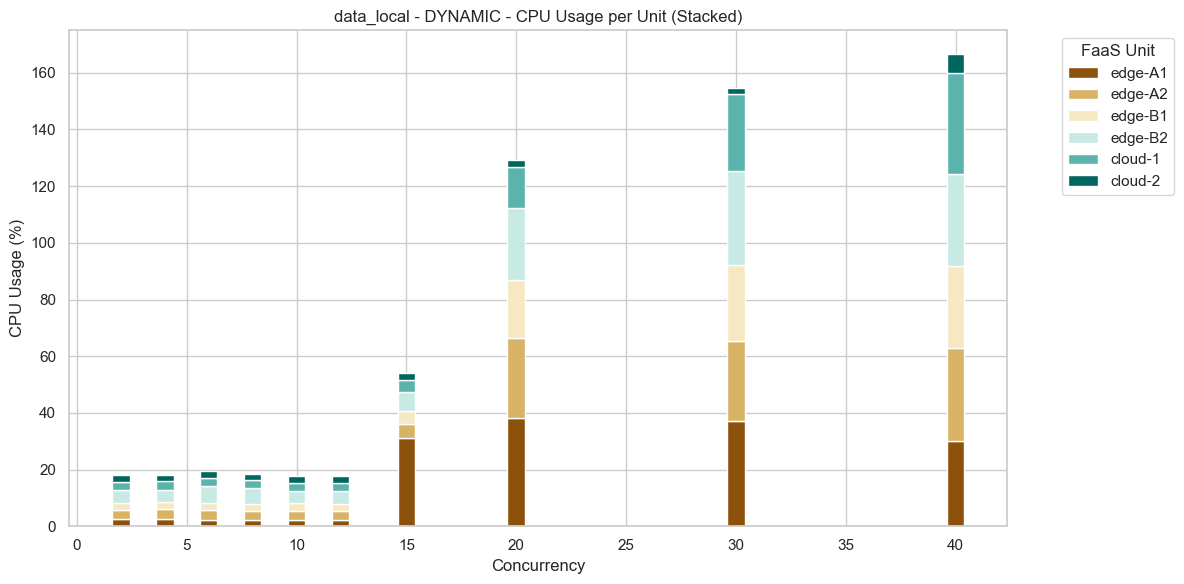

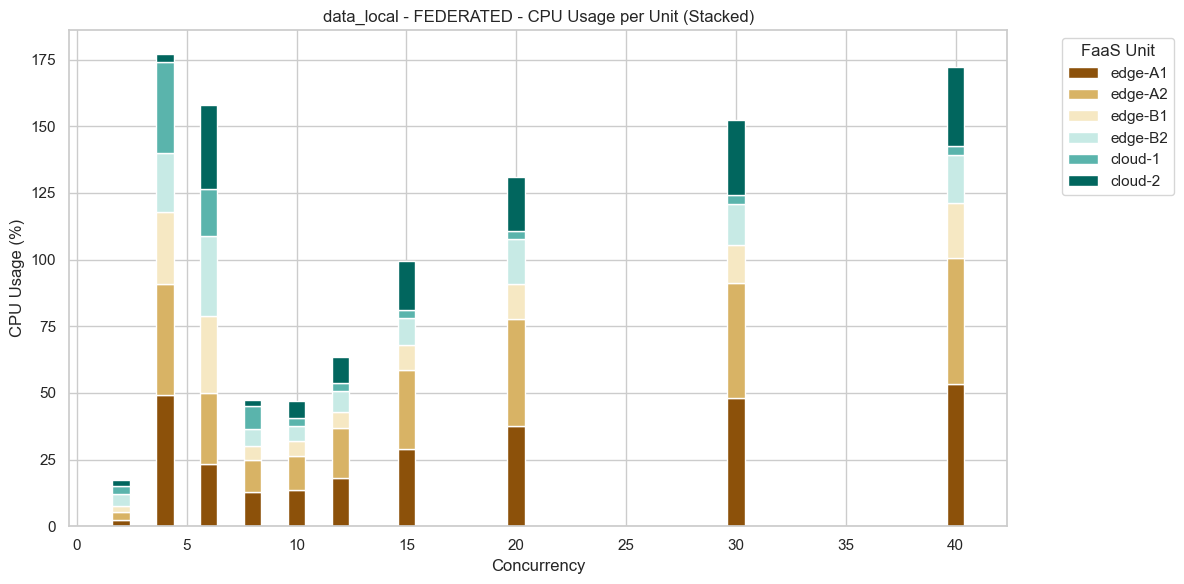

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 确保 faas_unit 显示顺序一致（可选：手动定义顺序）
faas_order = [
    "edge-A1", "edge-A2", "edge-B1", "edge-B2", "cloud-1", "cloud-2"
]

color_map = {
    "edge-A1": "#8c510a",
    "edge-A2": "#d8b365",
    "edge-B1": "#f6e8c3",
    "edge-B2": "#c7eae5",
    "cloud-1": "#5ab4ac",
    "cloud-2": "#01665e"
}

for fn in ["basic", "data_local"]:
    fn_df = df_all[df_all["fn_type"] == fn]

    # 使用 architecture + concurrency 作为柱子（x 轴），堆叠 faas_unit
    grouped = fn_df.groupby(["concurrency", "architecture", "faas_unit"])["avg_cpu"].mean().reset_index()

    for arch in grouped["architecture"].unique():
        arch_df = grouped[grouped["architecture"] == arch]
        pivot = arch_df.pivot(index="concurrency", columns="faas_unit", values="avg_cpu").fillna(0)
        pivot = pivot[faas_order]  # 确保列顺序一致

        # 画图
        fig, ax = plt.subplots(figsize=(12, 6))
        bottom = pd.Series([0] * len(pivot), index=pivot.index)

        for unit in faas_order:
            ax.bar(
                pivot.index,
                pivot[unit],
                bottom=bottom,
                label=unit,
                color=color_map.get(unit, None)
            )
            bottom += pivot[unit]

        ax.set_title(f"{fn} - {arch.upper()} - CPU Usage per Unit (Stacked)")
        ax.set_xlabel("Concurrency")
        ax.set_ylabel("CPU Usage (%)")
        ax.legend(title="FaaS Unit", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.show()
